## Cel: Przewidzieć przyczynę opóźnienia przylotu samolotu

### 0. Informacje na temat danych, żeby spróbować je jak najlepiej zrozumieć
Próbujmy zawsze dowiedzieć się jak najwiecej o danych na których mamy pracować. 

Jeśli nasze dane pochodzą z internetu -> poszukajmy dołączonej dokumentacji

Jeśli dane pochodzą z firmy w której pracujemy -> poszukajmy osób które na co dzień pracują z tymi danymi i mogą nam coś więcej o nich powiedzieć 

Jeśli dane są prywatne -> poszukajmy kogoś odpowiedzialnego za nie.

Spróbujmy zawsze zdobyć choćby poniższe minimum informacji: 
- w jaki sposób dane zostały zebrane
-jakie potencjalne problemy występują w danych
- co oznacza każda kolumna
- co oznaczają skróty
- co oznaczają nazwy kategorii
- jakie jednostki są użyte w kolumnach

Dane użyte do poniższego projektu pochodzą z:
https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=flights.csv 

Konkretny subset tych danych znajdziesz w pliku: 
https://drive.google.com/uc?export=download&id=1Mj1odTmwcY7w5kjnfNYAyQPNQnBZoPzB

### 1. Importujemy potrzebne pakiety i dane

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_flights = pd.read_csv('flights_data.csv')

/var/folders/mx/l5zhnlsn3bd6v9_zgvzrlm1r0000gn/T/ipykernel_82820/1330267942.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('flights_data.csv')


In [3]:
df_flights.shape

(1459172, 31)

In [4]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,6,10,3,OO,5365,N824AS,SBP,LAX,1037,...,1143.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,7,3,5,OO,6497,N746SK,DEN,LIT,955,...,1248.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,30,5,EV,5087,N851AS,13377,10397,1139,...,1410.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,12,8,2,UA,675,N76505,DEN,GEG,1115,...,1227.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,9,9,3,AA,1722,N748UW,CLT,DCA,945,...,1108.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459167,2015,2,5,4,UA,1275,N37290,SFO,SAN,1047,...,1257.0,36.0,0,0,NaN,21.0,0.0,0.0,15.0,0.0
1459168,2015,3,22,7,DL,2434,N377DA,LAX,BNA,935,...,1546.0,20.0,0,0,NaN,7.0,0.0,8.0,5.0,0.0
1459169,2015,2,13,5,WN,830,N7749B,BWI,ALB,2210,...,2347.0,27.0,0,0,NaN,0.0,0.0,23.0,4.0,0.0
1459170,2015,7,29,3,MQ,3268,N641MQ,MIA,GNV,1340,...,1530.0,40.0,0,0,NaN,40.0,0.0,0.0,0.0,0.0


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,6,10,3,OO,5365,N824AS,SBP,LAX,1037,1036.0,-1.0,9.0,1045.0,65.0,67.0,40.0,156,1125.0,18.0,1142,1143.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,7,3,5,OO,6497,N746SK,DEN,LIT,955,949.0,-6.0,19.0,1008.0,126.0,119.0,95.0,771,1243.0,5.0,1301,1248.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,30,5,EV,5087,N851AS,13377,10397,1139,1137.0,-2.0,13.0,1150.0,96.0,93.0,69.0,448,1359.0,11.0,1415,1410.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,12,8,2,UA,675,N76505,DEN,GEG,1115,1109.0,-6.0,10.0,1119.0,148.0,138.0,125.0,836,1224.0,3.0,1243,1227.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,9,9,3,AA,1722,N748UW,CLT,DCA,945,945.0,0.0,20.0,1005.0,86.0,83.0,58.0,331,1103.0,5.0,1111,1108.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Podstawowe kroki eksploracji danych


1️⃣ Brakujące wartości (*missing values*) 
- **Czym są?**  
  Puste lub nieuzupełnione pola w danych. Mogą powstać przez błędy podczas zbierania danych lub ich przetwarzania.  
- **Dlaczego ważne?**  
  Mogą prowadzić do błędnych analiz lub przerwania działania algorytmów.  

2️⃣ Wartości odstające (*outliers*)  
- **Czym są?**  
  Nietypowe dane, które znacząco odbiegają od większości wartości w zbiorze.  
- **Dlaczego ważne?**  
  Mogą zniekształcić analizę statystyczną i wyniki modeli.  

3️⃣ Zmienne kategoryczne (*categorical values*)  
- **Czym są?**  
  Dane reprezentujące kategorie lub grupy, które nie mają liczbowego znaczenia.  
- **Dlaczego ważne?**  
  Wymagają odpowiedniego kodowania przed analizą (np. dla modeli ML).  


4️⃣ Zmienne binarne (*binary values*)  
- **Czym są?**  
  Zmienne, które mogą przyjmować tylko dwie wartości (np.płeć).  
- **Dlaczego ważne?**  
  Są łatwe do analizy, ale wymagają jednolitego formatowania.  


5️⃣ Typy kolumn (*column types*)  
- **Czym są?**  
  Określają rodzaj danych w kolumnie, np. liczby całkowite, zmiennoprzecinkowe, tekstowe czy daty.  
- **Dlaczego ważne?**  
  Odpowiedni typ danych wpływa na sposób analizy i przetwarzania.


### Czyszczenie danych
Zdefiniowany cel determinuje nam które kolumny/kombinacje kolumn bedą naszą kolumną docelową (*target column*).
Kolumna docelowa to ta, którą chcemy przewidzieć za pomocą modelu uczenia maszynowego.

Podczas budowy modelu dowiemy się też, które kolumny są zbędne i nie wnoszą wartości do analizy.

Zanim przejdziemy do eksploracji danych, warto przejrzeć wszystkie kolumny z myślą o końcowym celu i od razu usunąć te, które nie będą potrzebne podczas trenowania modelu.

Na razie jednak zostawimy więcej kolumn niż faktycznie potrzebujemy. Dodatkowe informacje mogą być przydatne podczas eksploracji i czyszczenia danych.

In [7]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
df_flights = df_flights [['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [9]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,6,10,3,OO,SBP,LAX,1037,1036.0,-1.0,156,1142,1143.0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,7,3,5,OO,DEN,LIT,955,949.0,-6.0,771,1301,1248.0,-13.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10,30,5,EV,13377,10397,1139,1137.0,-2.0,448,1415,1410.0,-5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,12,8,2,UA,DEN,GEG,1115,1109.0,-6.0,836,1243,1227.0,-16.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,9,9,3,AA,CLT,DCA,945,945.0,0.0,331,1111,1108.0,-3.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459167,2015,2,5,4,UA,SFO,SAN,1047,1134.0,47.0,447,1221,1257.0,36.0,0,NaN,21.0,0.0,0.0,15.0,0.0
1459168,2015,3,22,7,DL,LAX,BNA,935,948.0,13.0,1797,1526,1546.0,20.0,0,NaN,7.0,0.0,8.0,5.0,0.0
1459169,2015,2,13,5,WN,BWI,ALB,2210,2251.0,41.0,289,2320,2347.0,27.0,0,NaN,0.0,0.0,23.0,4.0,0.0
1459170,2015,7,29,3,MQ,MIA,GNV,1340,1345.0,5.0,294,1450,1530.0,40.0,0,NaN,40.0,0.0,0.0,0.0,0.0


In [10]:
missing_counts = df_flights.isna().sum()
missing_counts

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME            7164
DEPARTURE_DELAY           7164
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              7666
ARRIVAL_DELAY             8719
CANCELLED                    0
CANCELLATION_REASON    1451711
AIR_SYSTEM_DELAY        395733
SECURITY_DELAY          395733
AIRLINE_DELAY           395733
LATE_AIRCRAFT_DELAY     395733
WEATHER_DELAY           395733
dtype: int64

In [11]:
df_flights[df_flights['ARRIVAL_DELAY'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
54,2015,4,9,4,US,CLT,ORD,1450,NaN,NaN,599,1600,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
61,2015,3,5,4,EV,ORD,JAN,850,NaN,NaN,677,1111,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
98,2015,2,5,4,WN,SMF,LAX,540,537.0,-3.0,373,705,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
145,2015,12,11,5,OO,SLC,SUN,1115,1115.0,0.0,222,1227,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
208,2015,7,9,4,UA,EWR,MSP,2050,NaN,NaN,1008,2300,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395405,2015,5,15,5,OO,SJC,LAX,1832,1829.0,-3.0,308,1955,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
395550,2015,12,30,3,UA,SFO,LIH,902,903.0,1.0,2447,1250,1727.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
395551,2015,2,9,1,OO,DSM,DEN,928,NaN,NaN,589,1035,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
395638,2015,7,25,6,OO,TUL,IAH,630,NaN,NaN,429,804,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


In [12]:
missing_values_reasons = df_flights[df_flights['AIR_SYSTEM_DELAY'].isna() & df_flights['SECURITY_DELAY'].isna() & df_flights['AIRLINE_DELAY'].isna() & df_flights['LATE_AIRCRAFT_DELAY'].isna() & df_flights['WEATHER_DELAY'].isna()]
missing_values_reasons.shape

(395733, 21)

### Wizualizujemy dane 

Histogramy to świetne narzędzie do wstępnego zapoznania się z danymi.

Pokazują one, jak często dana wartość pojawia się w zbiorze danych — oś Y wskazuje liczbę wystąpień, a oś X przedstawia zakres wartości.

Jeśli na histogramie widzisz, że większość danych skupia się wokół jednej wartości (np. 0), ale oś X sięga np. do 1000, oznacza to, że istnieją również wyższe wartości, choć pojawiają się one tak rzadko, że są praktycznie niewidoczne na wykresie.

Takie sytuacje mogą wskazywać na obecność wartości odstających (outliers) i sugerują, że warto przyjrzeć się bliżej tym kolumnom.

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'DISTANCE'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>],
       [<Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>],
       [<Axes: title={'center': 'WEATHER_DELAY'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

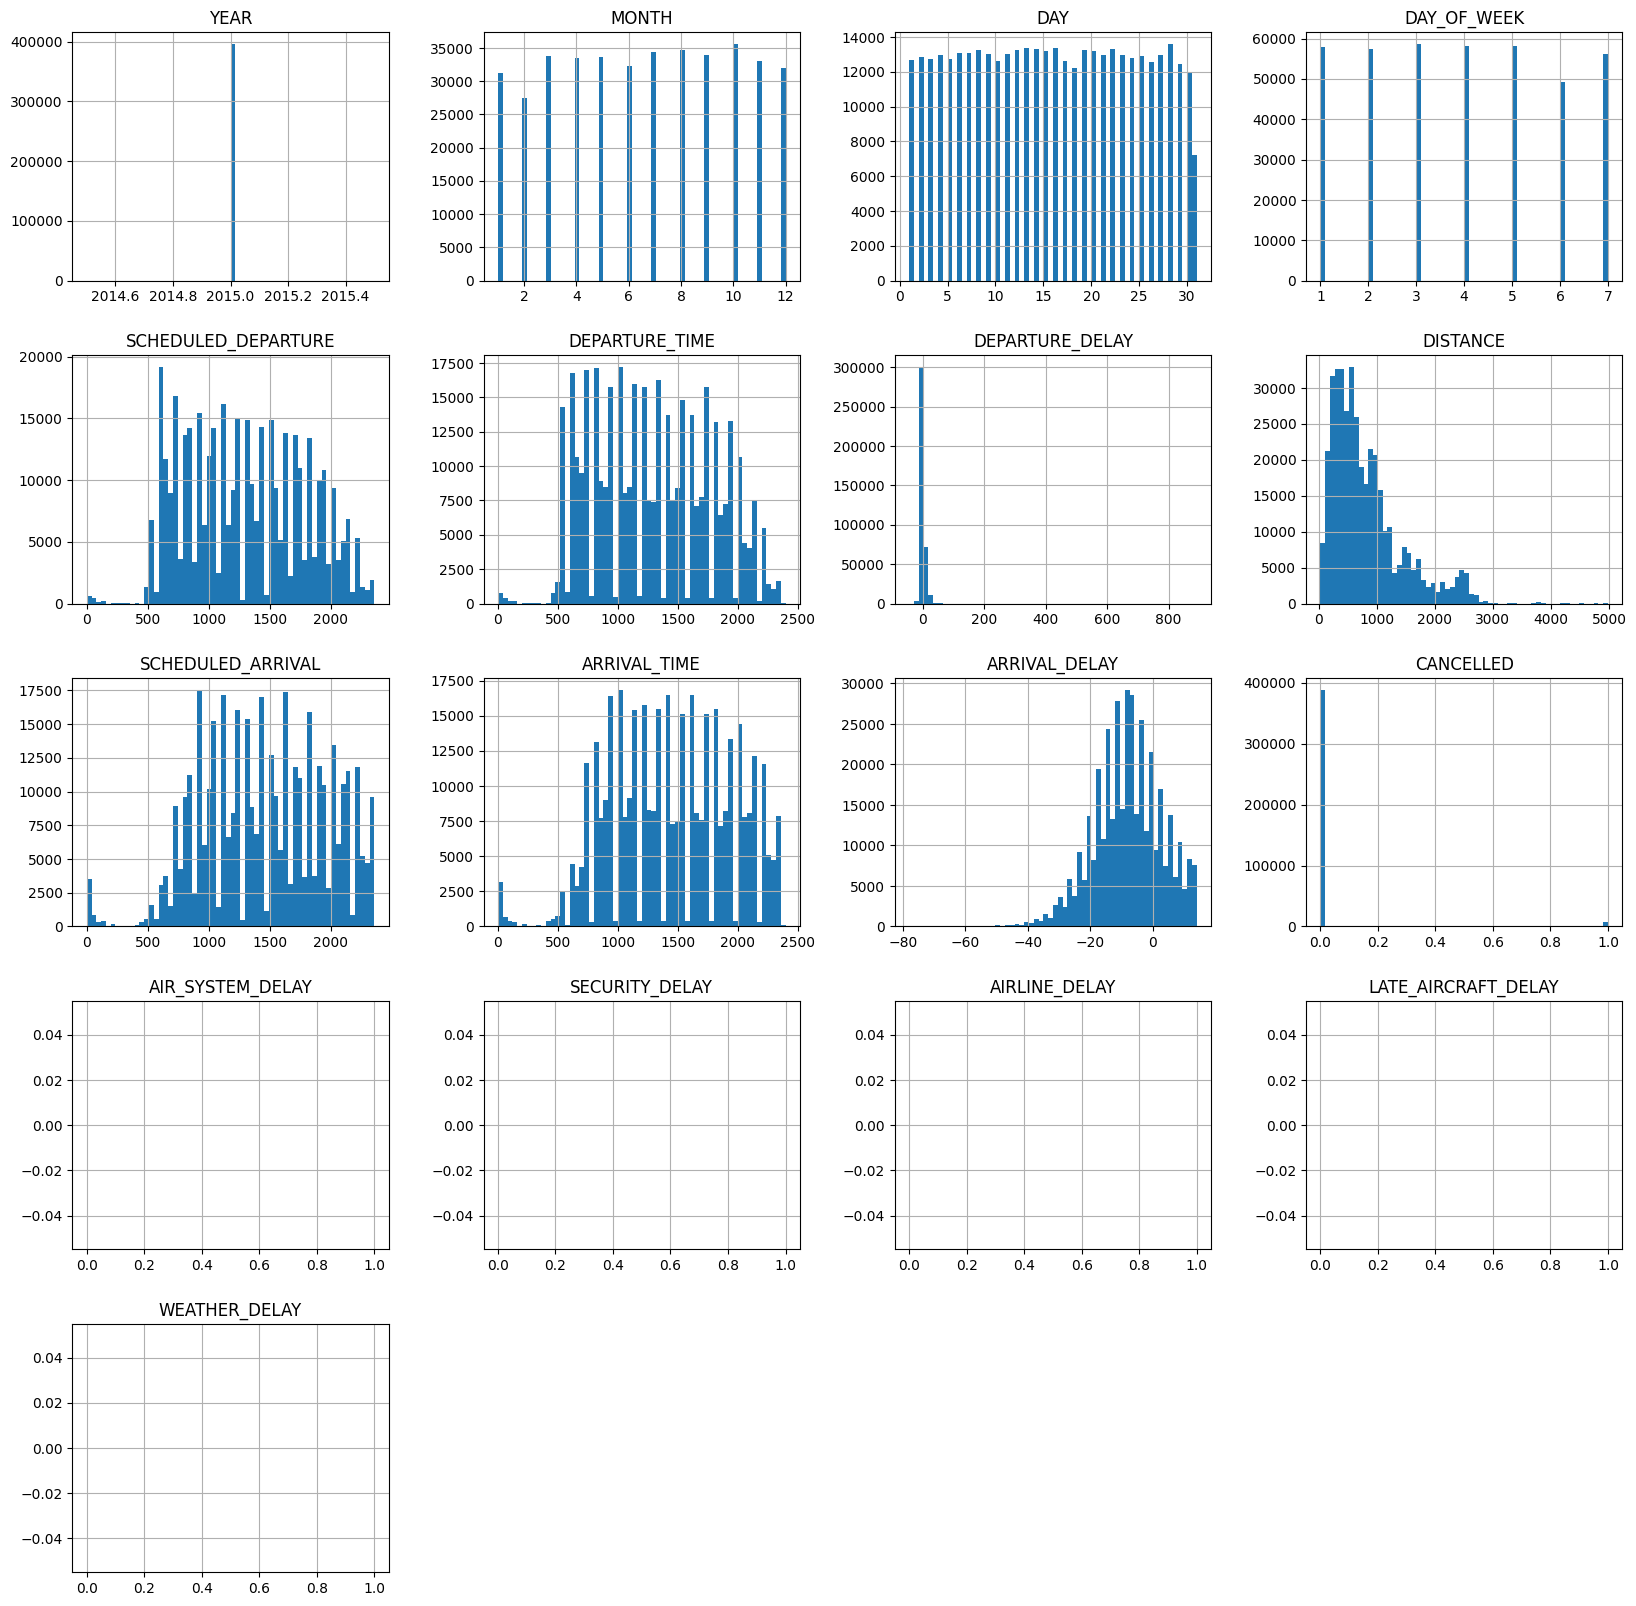

In [13]:
missing_values_reasons.hist(bins=60, figsize=(20,20))

In [14]:
missing_values_reasons[missing_values_reasons['ARRIVAL_DELAY']>13]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
100,2015,6,27,6,WN,SEA,ABQ,1255,1305.0,10.0,1180,1650,1704.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
313,2015,4,27,1,WN,MCO,BUF,2140,2201.0,21.0,1011,15,29.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
529,2015,1,30,5,DL,SLC,JFK,1354,1424.0,30.0,1990,2019,2033.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
564,2015,2,12,4,UA,SFO,PDX,1922,1946.0,24.0,550,2107,2121.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
788,2015,6,3,3,US,LGA,CLT,1008,1002.0,-6.0,544,1221,1235.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395308,2015,6,9,2,WN,PHX,SAN,1510,1522.0,12.0,304,1610,1624.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
395374,2015,4,30,4,B6,DTW,FLL,1909,1920.0,11.0,1127,2205,2219.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
395545,2015,10,8,4,HA,12173,12758,934,933.0,-1.0,163,1021,1035.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN
395689,2015,2,4,3,VX,SFO,AUS,1610,1629.0,19.0,1504,2130,2144.0,14.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_flights[df_flights['ARRIVAL_DELAY'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
54,2015,4,9,4,US,CLT,ORD,1450,NaN,NaN,599,1600,NaN,NaN,1,C,NaN,NaN,NaN,NaN,NaN
61,2015,3,5,4,EV,ORD,JAN,850,NaN,NaN,677,1111,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
98,2015,2,5,4,WN,SMF,LAX,540,537.0,-3.0,373,705,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
145,2015,12,11,5,OO,SLC,SUN,1115,1115.0,0.0,222,1227,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
208,2015,7,9,4,UA,EWR,MSP,2050,NaN,NaN,1008,2300,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395405,2015,5,15,5,OO,SJC,LAX,1832,1829.0,-3.0,308,1955,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
395550,2015,12,30,3,UA,SFO,LIH,902,903.0,1.0,2447,1250,1727.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
395551,2015,2,9,1,OO,DSM,DEN,928,NaN,NaN,589,1035,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
395638,2015,7,25,6,OO,TUL,IAH,630,NaN,NaN,429,804,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


In [16]:
arrival_delay = df_flights[df_flights['ARRIVAL_DELAY'].isna()]

In [17]:
arrival_delay['CANCELLED'].value_counts()

CANCELLED
1    7461
0    1258
Name: count, dtype: int64

In [18]:
df_flights = df_flights[~df_flights['ARRIVAL_DELAY'].isna()]

In [19]:
df_flights.shape

(1450453, 21)

In [20]:
df_flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
CANCELLED                    0
CANCELLATION_REASON    1450453
AIR_SYSTEM_DELAY        387014
SECURITY_DELAY          387014
AIRLINE_DELAY           387014
LATE_AIRCRAFT_DELAY     387014
WEATHER_DELAY           387014
dtype: int64

In [21]:
df_flights.loc[:,['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = df_flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].fillna(0)

In [22]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,6,10,3,OO,SBP,LAX,1037,1036.0,-1.0,156,1142,1143.0,1.0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,7,3,5,OO,DEN,LIT,955,949.0,-6.0,771,1301,1248.0,-13.0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,10,30,5,EV,13377,10397,1139,1137.0,-2.0,448,1415,1410.0,-5.0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,12,8,2,UA,DEN,GEG,1115,1109.0,-6.0,836,1243,1227.0,-16.0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,9,9,3,AA,CLT,DCA,945,945.0,0.0,331,1111,1108.0,-3.0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459167,2015,2,5,4,UA,SFO,SAN,1047,1134.0,47.0,447,1221,1257.0,36.0,0,NaN,21.0,0.0,0.0,15.0,0.0
1459168,2015,3,22,7,DL,LAX,BNA,935,948.0,13.0,1797,1526,1546.0,20.0,0,NaN,7.0,0.0,8.0,5.0,0.0
1459169,2015,2,13,5,WN,BWI,ALB,2210,2251.0,41.0,289,2320,2347.0,27.0,0,NaN,0.0,0.0,23.0,4.0,0.0
1459170,2015,7,29,3,MQ,MIA,GNV,1340,1345.0,5.0,294,1450,1530.0,40.0,0,NaN,40.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'DISTANCE'}>],
       [<Axes: title={'center': 'SCHEDULED_ARRIVAL'}>,
        <Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>],
       [<Axes: title={'center': 'AIR_SYSTEM_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>],
       [<Axes: title={'center': 'WEATHER_DELAY'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

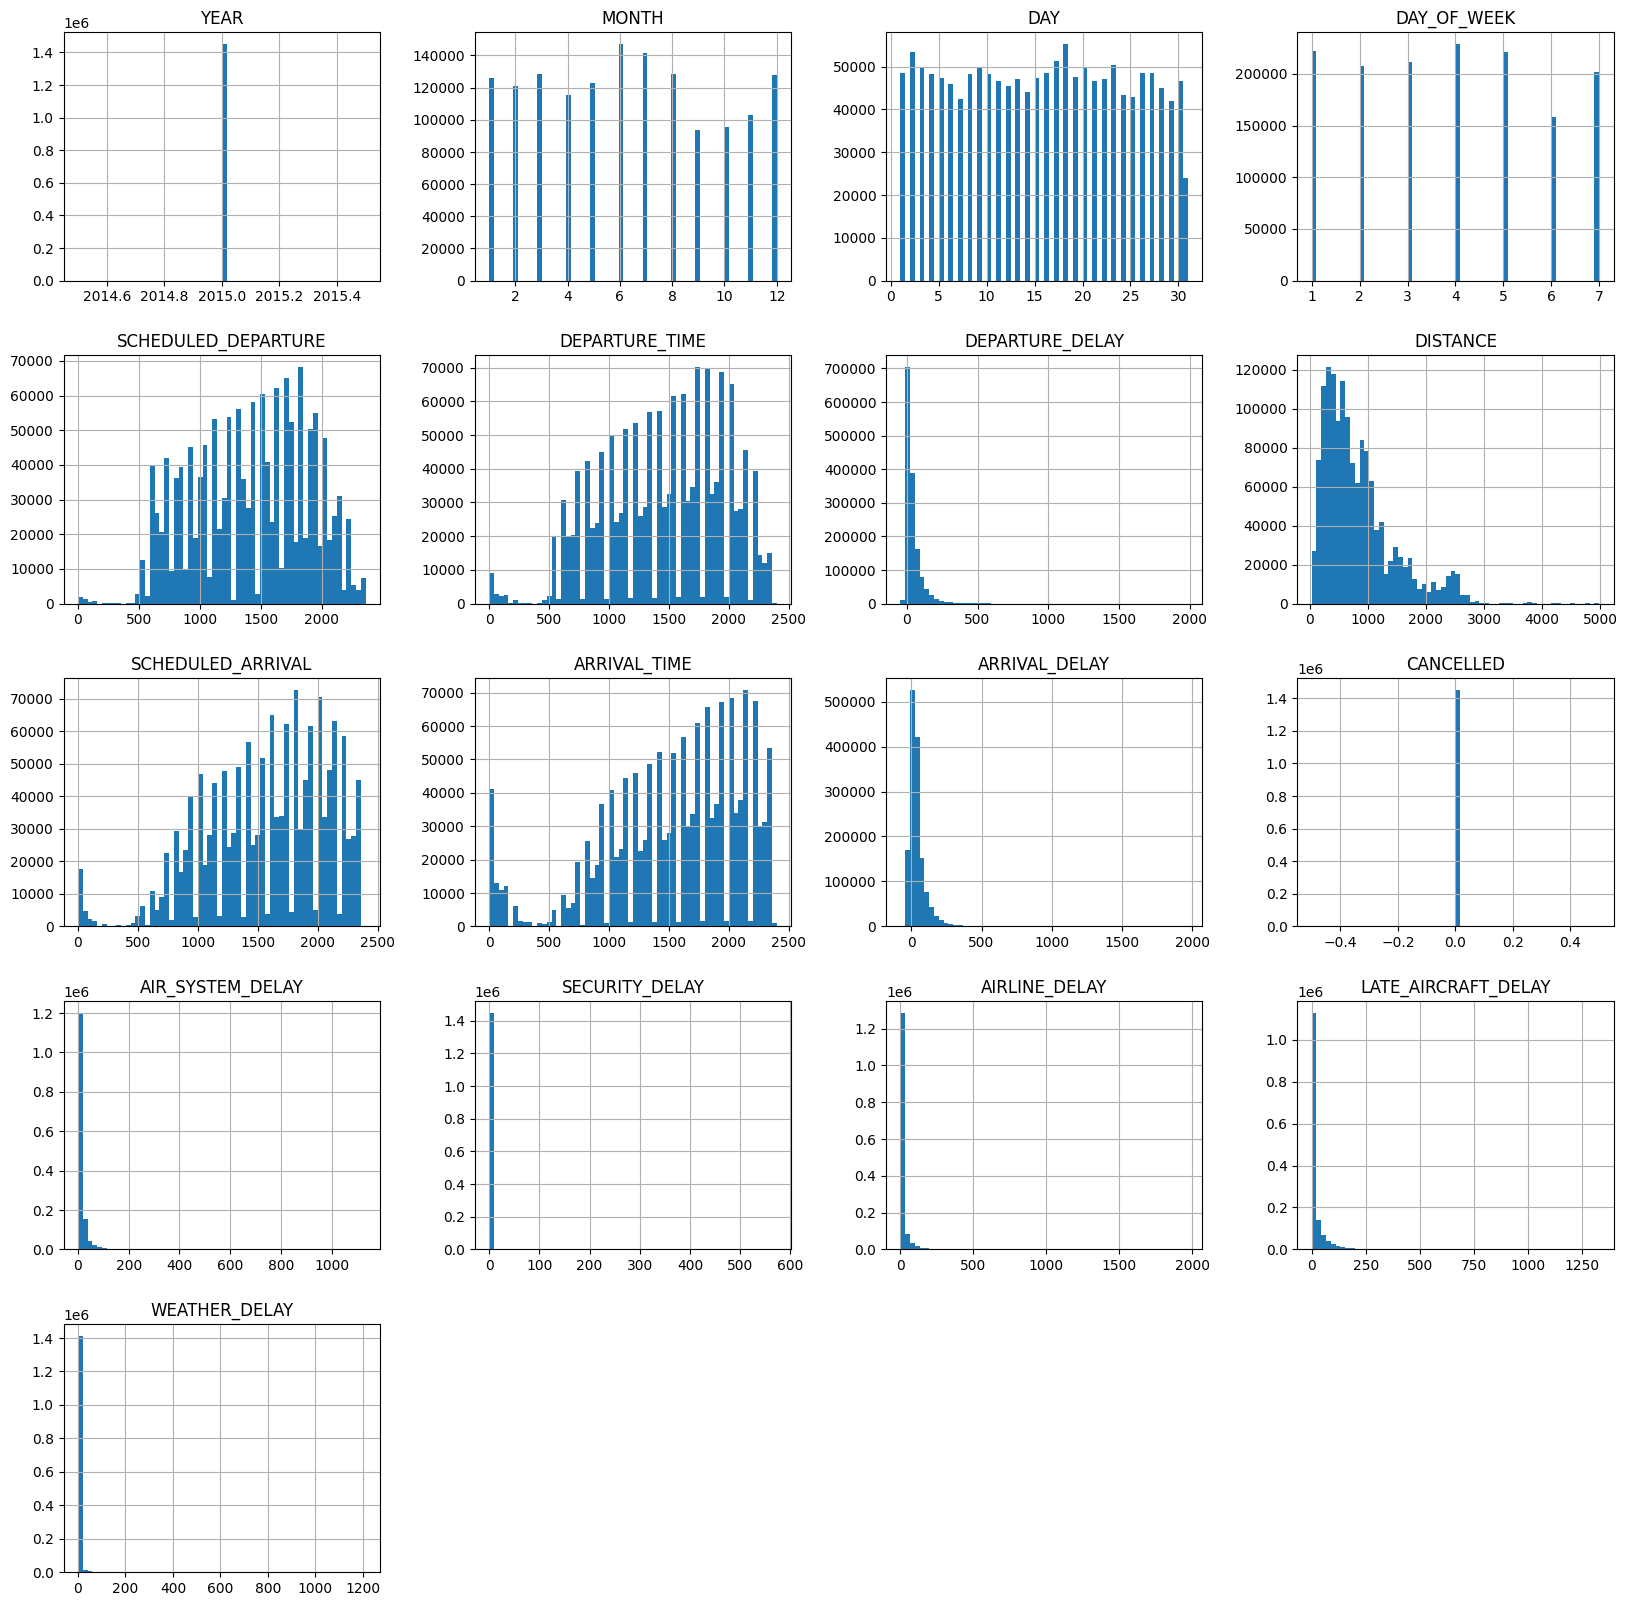

In [23]:
df_flights.hist(bins=60, figsize=(20,20))

In [24]:
df_flights[df_flights['ARRIVAL_DELAY']>1500]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
426313,2015,1,23,5,AA,BHM,DFW,700,1608.0,1988.0,597,914,1805.0,1971.0,0,NaN,0.0,0.0,1971.0,0.0,0.0
434761,2015,10,27,2,MQ,11612,13930,1443,1627.0,1544.0,272,1610,1738.0,1528.0,0,NaN,0.0,0.0,1528.0,0.0,0.0
444160,2015,1,27,2,AA,FAT,DFW,659,850.0,1551.0,1313,1210,1356.0,1546.0,0,NaN,0.0,0.0,1546.0,0.0,0.0
664809,2015,12,31,4,AA,ABQ,DFW,1041,1410.0,1649.0,569,1325,1641.0,1636.0,0,NaN,0.0,0.0,1636.0,0.0,0.0
687972,2015,6,22,1,AA,RIC,DFW,715,837.0,1522.0,1158,920,1028.0,1508.0,0,NaN,0.0,0.0,1508.0,0.0,0.0
719590,2015,3,25,3,AA,SMF,DFW,625,748.0,1523.0,1431,1149,1303.0,1514.0,0,NaN,0.0,0.0,1514.0,0.0,0.0
721880,2015,8,23,7,AA,HNL,LAX,710,825.0,1515.0,2556,1540,1754.0,1574.0,0,NaN,59.0,0.0,1515.0,0.0,0.0
730185,2015,10,12,1,AA,14747,11298,645,858.0,1573.0,1660,1243,1438.0,1555.0,0,NaN,0.0,0.0,1555.0,0.0,0.0
746363,2015,3,10,2,AA,SAT,DFW,850,1047.0,1557.0,247,1000,1154.0,1554.0,0,NaN,0.0,0.0,1554.0,0.0,0.0
748807,2015,4,28,2,AA,SAN,JFK,745,927.0,1542.0,2446,1615,1809.0,1554.0,0,NaN,12.0,0.0,838.0,704.0,0.0


In [25]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [26]:
df_flights = df_flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DISTANCE', 'SCHEDULED_ARRIVAL', 
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']]

In [27]:
df_flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DISTANCE                 int64
SCHEDULED_ARRIVAL        int64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [28]:
df_flights['AIRLINE'].value_counts()

AIRLINE
WN    319957
DL    180701
AA    178572
OO    146952
EV    146433
UA    138392
MQ     78778
B6     75902
US     49574
NK     40960
AS     34827
F9     29206
VX     15938
HA     14261
Name: count, dtype: int64

In [29]:
len(df_flights['ORIGIN_AIRPORT'].value_counts())

627

In [30]:
len(df_flights['DESTINATION_AIRPORT'].value_counts())

626

In [31]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [32]:
df_flights = df_flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']]

## Przygotowujemy TARGET FEATURE


In [33]:
df_flights['all_delays'] = df_flights[['AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].sum(axis=1)

In [34]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delays
0,2015,6,10,3,OO,1037,1142,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,7,3,5,OO,955,1301,-13.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,10,30,5,EV,1139,1415,-5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,12,8,2,UA,1115,1243,-16.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,9,9,3,AA,945,1111,-3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459167,2015,2,5,4,UA,1047,1221,36.0,21.0,0.0,0.0,15.0,0.0,36.0
1459168,2015,3,22,7,DL,935,1526,20.0,7.0,0.0,8.0,5.0,0.0,20.0
1459169,2015,2,13,5,WN,2210,2320,27.0,0.0,0.0,23.0,4.0,0.0,27.0
1459170,2015,7,29,3,MQ,1340,1450,40.0,40.0,0.0,0.0,0.0,0.0,40.0


In [35]:
df_flights['delay_reason'] = np.where(df_flights['all_delays']>0, df_flights[['AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].idxmax(axis=1), 'NO_DELAY')

In [36]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,all_delays,delay_reason
0,2015,6,10,3,OO,1037,1142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
1,2015,7,3,5,OO,955,1301,-13.0,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
2,2015,10,30,5,EV,1139,1415,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
3,2015,12,8,2,UA,1115,1243,-16.0,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
4,2015,9,9,3,AA,945,1111,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459167,2015,2,5,4,UA,1047,1221,36.0,21.0,0.0,0.0,15.0,0.0,36.0,AIR_SYSTEM_DELAY
1459168,2015,3,22,7,DL,935,1526,20.0,7.0,0.0,8.0,5.0,0.0,20.0,AIRLINE_DELAY
1459169,2015,2,13,5,WN,2210,2320,27.0,0.0,0.0,23.0,4.0,0.0,27.0,AIRLINE_DELAY
1459170,2015,7,29,3,MQ,1340,1450,40.0,40.0,0.0,0.0,0.0,0.0,40.0,AIR_SYSTEM_DELAY


In [37]:
df_flights['delay_reason'].value_counts()

delay_reason
LATE_AIRCRAFT_DELAY    410647
NO_DELAY               387014
AIRLINE_DELAY          311386
AIR_SYSTEM_DELAY       303784
WEATHER_DELAY           35711
SECURITY_DELAY           1911
Name: count, dtype: int64

<Axes: >

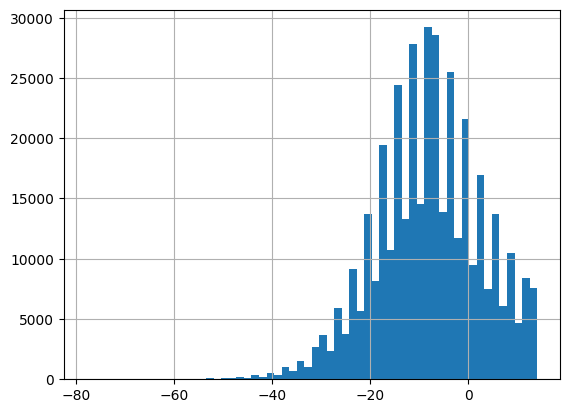

In [38]:
df_flights[df_flights['delay_reason']=='NO_DELAY']['ARRIVAL_DELAY'].hist(bins=60)

In [39]:
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'all_delays', 'delay_reason'],
      dtype='object')

In [40]:
df_flights = df_flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL','delay_reason']]

In [41]:
X_df_flights = df_flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL']]

X_df_flights = pd.get_dummies(X_df_flights).astype(int)

y_df_flights = df_flights[['delay_reason']]

In [42]:
X_df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,6,10,3,1037,1142,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2015,7,3,5,955,1301,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2015,10,30,5,1139,1415,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2015,12,8,2,1115,1243,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2015,9,9,3,945,1111,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459167,2015,2,5,4,1047,1221,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1459168,2015,3,22,7,935,1526,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1459169,2015,2,13,5,2210,2320,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1459170,2015,7,29,3,1340,1450,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
y_df_flights

,delay_reason
0,NO_DELAY
1,NO_DELAY
2,NO_DELAY
3,NO_DELAY
4,NO_DELAY
...,...
1459167,AIR_SYSTEM_DELAY
1459168,AIRLINE_DELAY
1459169,AIRLINE_DELAY
1459170,AIR_SYSTEM_DELAY
